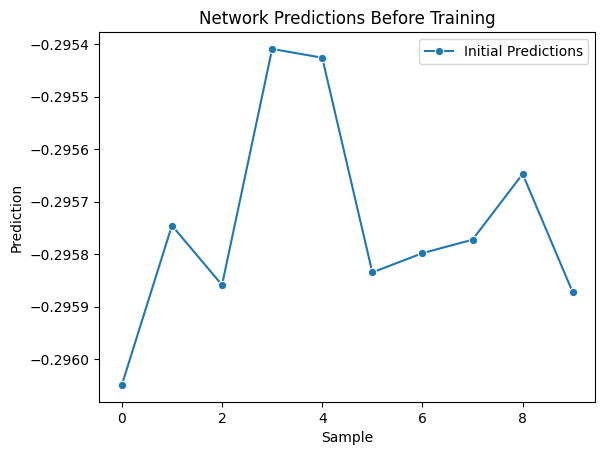

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(3, 3)
        self.hidden2 = nn.Linear(3, 3)
        self.hidden3 = nn.Linear(3, 3)
        self.output = nn.Linear(3, 1)

        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.sigmoid(self.hidden1(x))
        x = self.sigmoid(self.hidden2(x))
        x = self.sigmoid(self.hidden3(x))
        x = self.tanh(self.output(x))
        return x

inputs = torch.rand(10, 3)

model = SimpleNeuralNetwork()

initial_predictions = model(inputs).detach().numpy()
sns.lineplot(data=initial_predictions.flatten(), marker='o', label='Initial Predictions')
plt.title('Network Predictions Before Training')
plt.xlabel('Sample')
plt.ylabel('Prediction')
plt.show()


In [3]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

true_outputs = torch.rand(10, 1)


In [4]:

epochs = 100
for epoch in range(epochs):
    #
    predictions = model(inputs)

    loss = criterion(predictions, true_outputs)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

final_predictions = model(inputs).detach().numpy()


Epoch 10/100, Loss: 0.329851359128952
Epoch 20/100, Loss: 0.20916935801506042
Epoch 30/100, Loss: 0.14818894863128662
Epoch 40/100, Loss: 0.11817373335361481
Epoch 50/100, Loss: 0.10312242805957794
Epoch 60/100, Loss: 0.09534509479999542
Epoch 70/100, Loss: 0.09120865166187286
Epoch 80/100, Loss: 0.08895449340343475
Epoch 90/100, Loss: 0.0877019613981247
Epoch 100/100, Loss: 0.08699531853199005


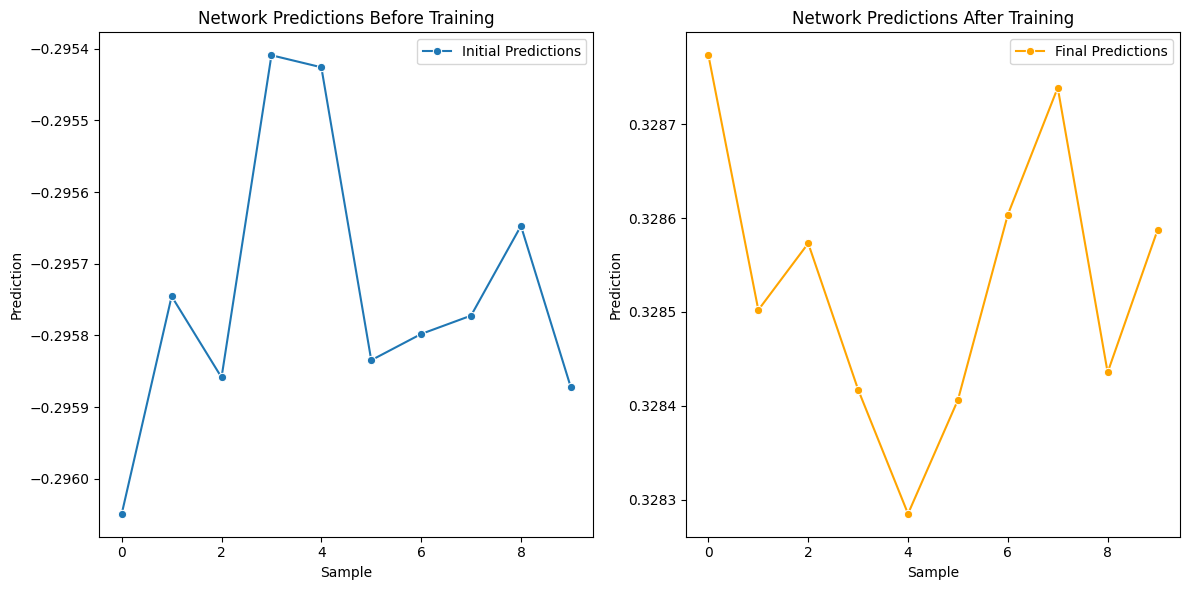

In [5]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=initial_predictions.flatten(), marker='o', label='Initial Predictions')
plt.title('Network Predictions Before Training')
plt.xlabel('Sample')
plt.ylabel('Prediction')

plt.subplot(1, 2, 2)
sns.lineplot(data=final_predictions.flatten(), marker='o', color='orange', label='Final Predictions')
plt.title('Network Predictions After Training')
plt.xlabel('Sample')
plt.ylabel('Prediction')

plt.tight_layout()
plt.show()
